In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('cleaned_data.xlsx')

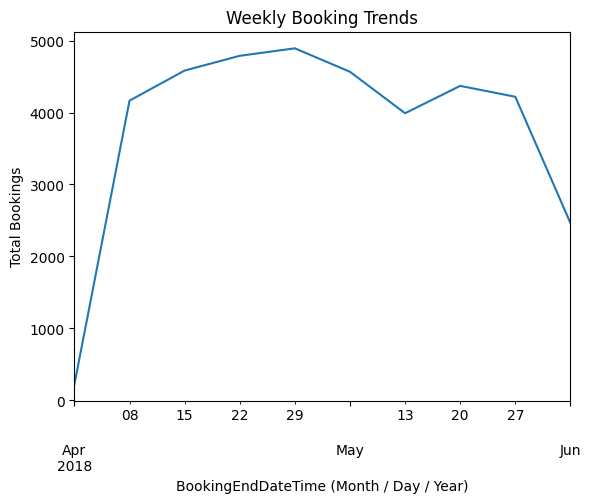

In [ ]:
import matplotlib.pyplot as plt
df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)'])
df.set_index('BookingEndDateTime (Month / Day / Year)', inplace=True)
df.resample('W')['Number Booked'].sum().plot(kind='line')
plt.title('Weekly Booking Trends')
plt.ylabel('Total Bookings')
plt.show()

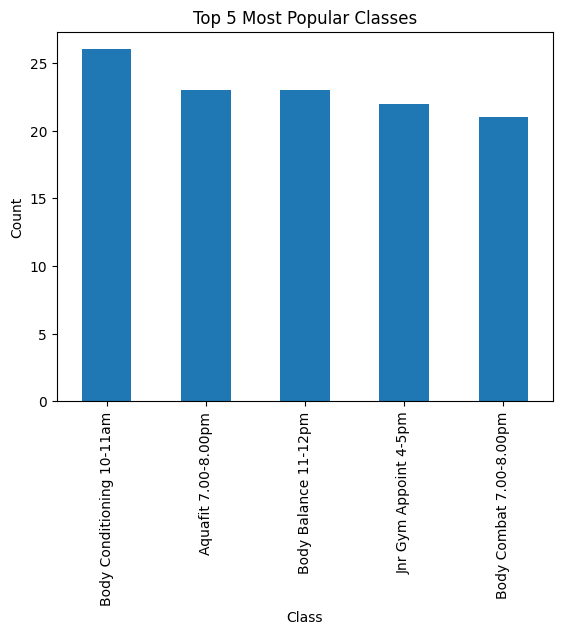

In [ ]:
df['ActivityDescription'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 Most Popular Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:

print(df[['Number Booked', 'Price (INR)', 'MaxBookees']].describe())

       Number Booked  Price (INR)   MaxBookees
count     2159.00000  2159.000000  2159.000000
mean        17.72163  1855.368689    32.260306
std          9.63677   801.420753    15.016452
min          1.00000   499.000000     2.000000
25%         10.00000  1299.000000    24.000000
50%         17.00000  1499.000000    30.000000
75%         25.00000  2499.000000    35.000000
max         64.00000  3999.000000    70.000000


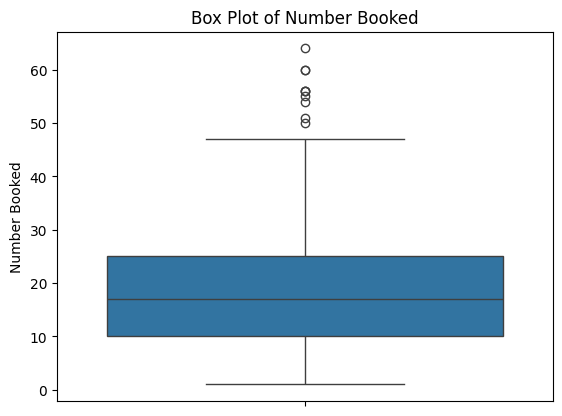

In [ ]:

sns.boxplot(y=df['Number Booked'])
plt.title('Box Plot of Number Booked')
plt.show()

In [ ]:

df_no_outliers = df[df['Number Booked'] < 35]

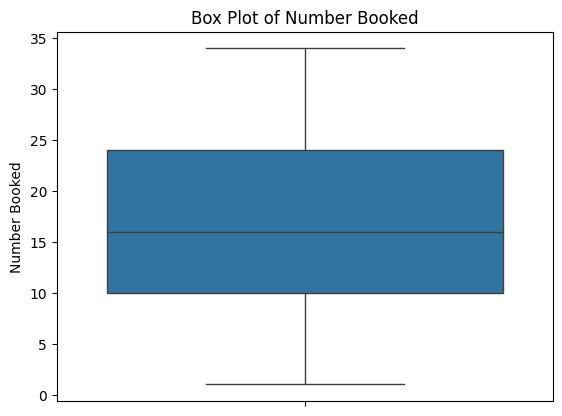

In [ ]:
sns.boxplot(y=df_no_outliers['Number Booked'])
plt.title('Box Plot of Number Booked')
plt.show()

/tmp/ipython-input-3983579187.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['BookingStartTime'] = pd.to_datetime(df['BookingStartTime'])


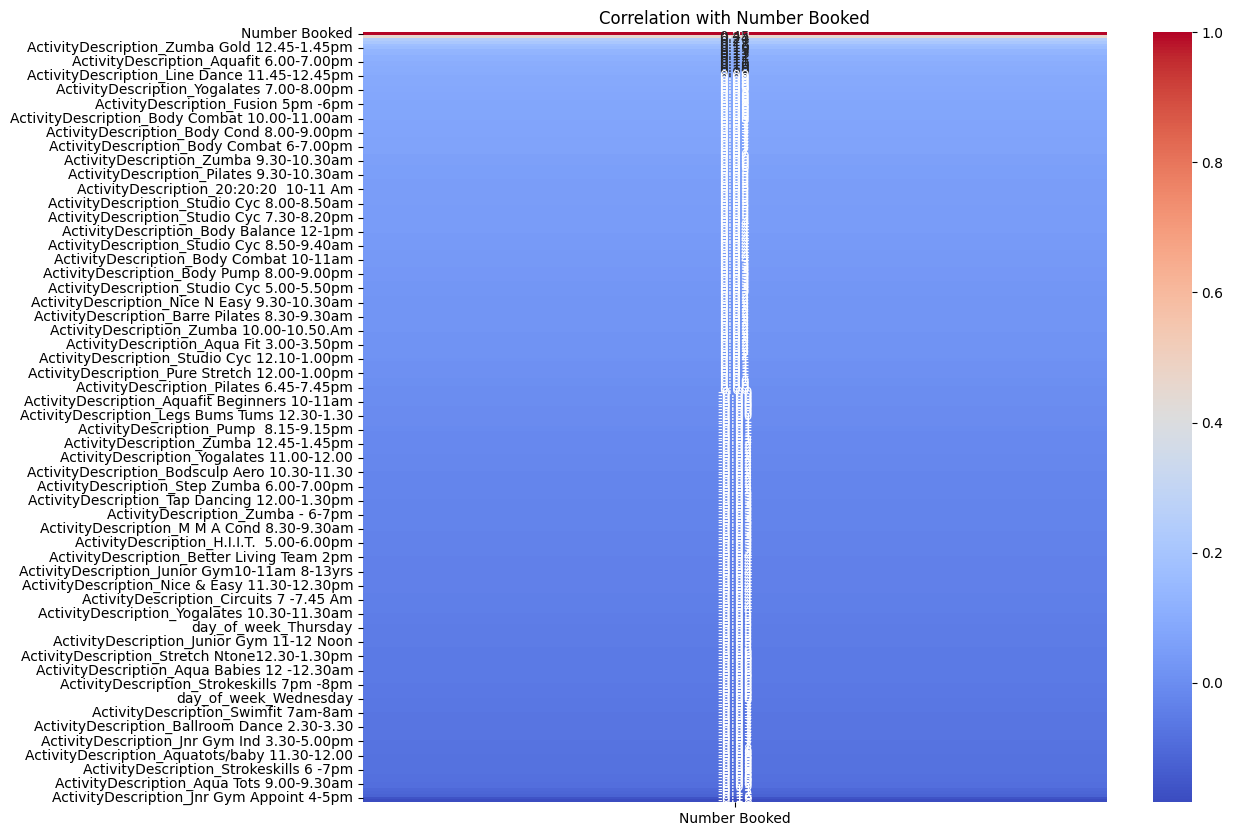

In [ ]:

df.reset_index(inplace=True)


df['day_of_week'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)']).dt.day_name()


df['BookingStartTime'] = pd.to_datetime(df['BookingStartTime'])


def categorize_time(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['BookingStartTime'].apply(categorize_time)


df_encoded = pd.get_dummies(df, columns=['day_of_week', 'time_of_day', 'ActivityDescription'], drop_first=True)


numerical_cols = ['Price (INR)', 'Number Booked', 'MaxBookees']
encoded_cols = [col for col in df_encoded.columns if 'day_of_week_' in col or 'time_of_day_' in col or 'ActivityDescription_' in col]
correlation_df = df_encoded[numerical_cols + encoded_cols]


correlation_matrix = correlation_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Number Booked']].sort_values(by='Number Booked', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Number Booked')
plt.show()

In [ ]:

df['day_of_week'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)']).dt.day_name()


def categorize_time(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['BookingStartTime'].apply(categorize_time)

In [ ]:
print(df.columns)

Index(['level_0', 'index', 'BookingEndDateTime (Month / Day / Year)',
       'ActivitySiteID', 'ActivityDescription', 'BookingStartTime',
       'MaxBookees', 'Number Booked', 'Price (INR)', 'day_of_week',
       'time_of_day'],
      dtype='object')


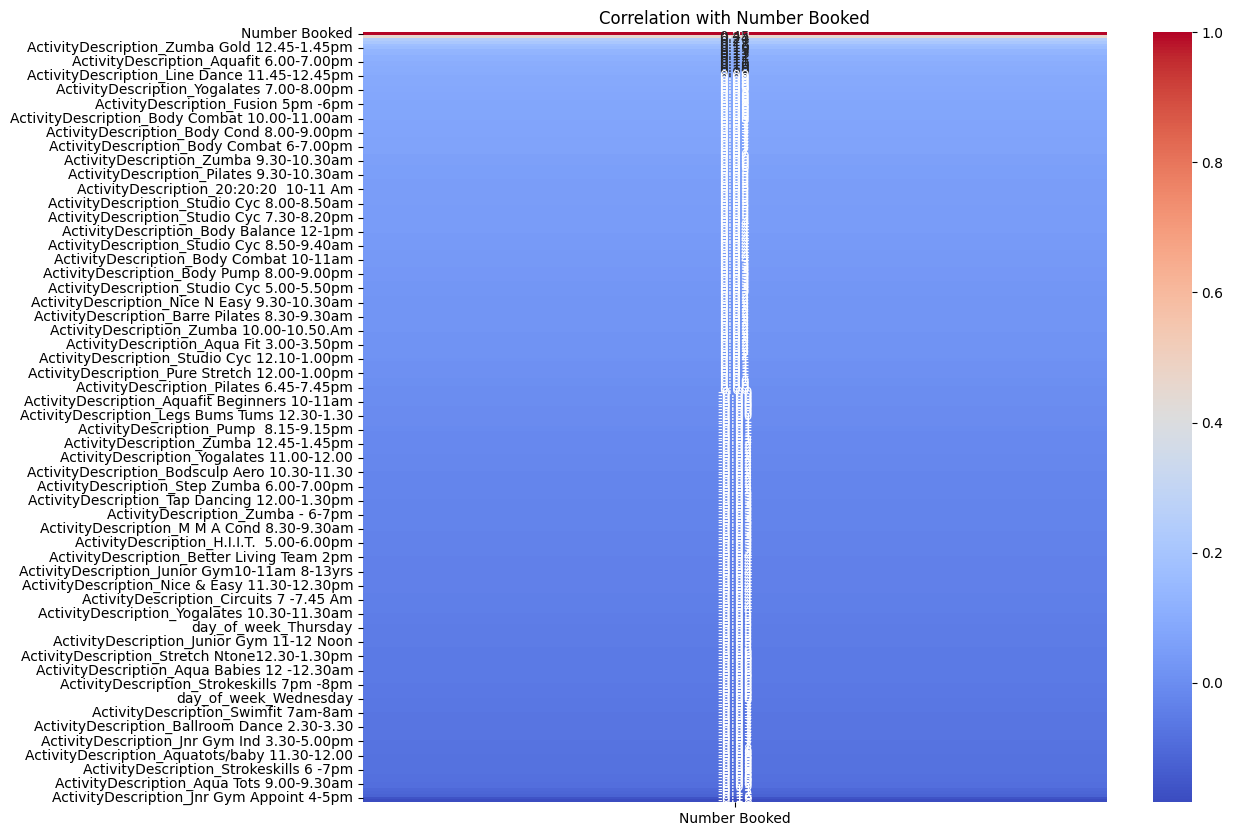

In [ ]:

df['day_of_week'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)']).dt.day_name()


df['BookingStartTime'] = pd.to_datetime(df['BookingStartTime'])


def categorize_time(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['BookingStartTime'].apply(categorize_time)


df_encoded = pd.get_dummies(df, columns=['day_of_week', 'time_of_day', 'ActivityDescription'], drop_first=True)


numerical_cols = ['Price (INR)', 'Number Booked', 'MaxBookees']
encoded_cols = [col for col in df_encoded.columns if 'day_of_week_' in col or 'time_of_day_' in col or 'ActivityDescription_' in col]
correlation_df = df_encoded[numerical_cols + encoded_cols]


correlation_matrix = correlation_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Number Booked']].sort_values(by='Number Booked', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Number Booked')
plt.show()